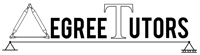
<center>www.DegreeTutors.com</center>

# Closed-form solution for cable hanging under self-weight
## Solving for max cable tension

In [26]:
# DEPENDENCIES
import copy
import math
import numpy as np
import matplotlib.pyplot as plt
import csv

## Problem input parameters

In [27]:
#Input parameters
Length_meters = 10 #(m) Plan length
y_max_meters = 2 #(m) Mid-span sag - find value of H that achieves this target value of y
span_weight_newtons = 981 #(N) Self-weight per meter of cable (along the curve)

## Solve for the value of H to achieve desired sag

[ 0.65560144  0.65553995  0.65547845 ... -0.74892764 -0.74894065
 -0.74895366]


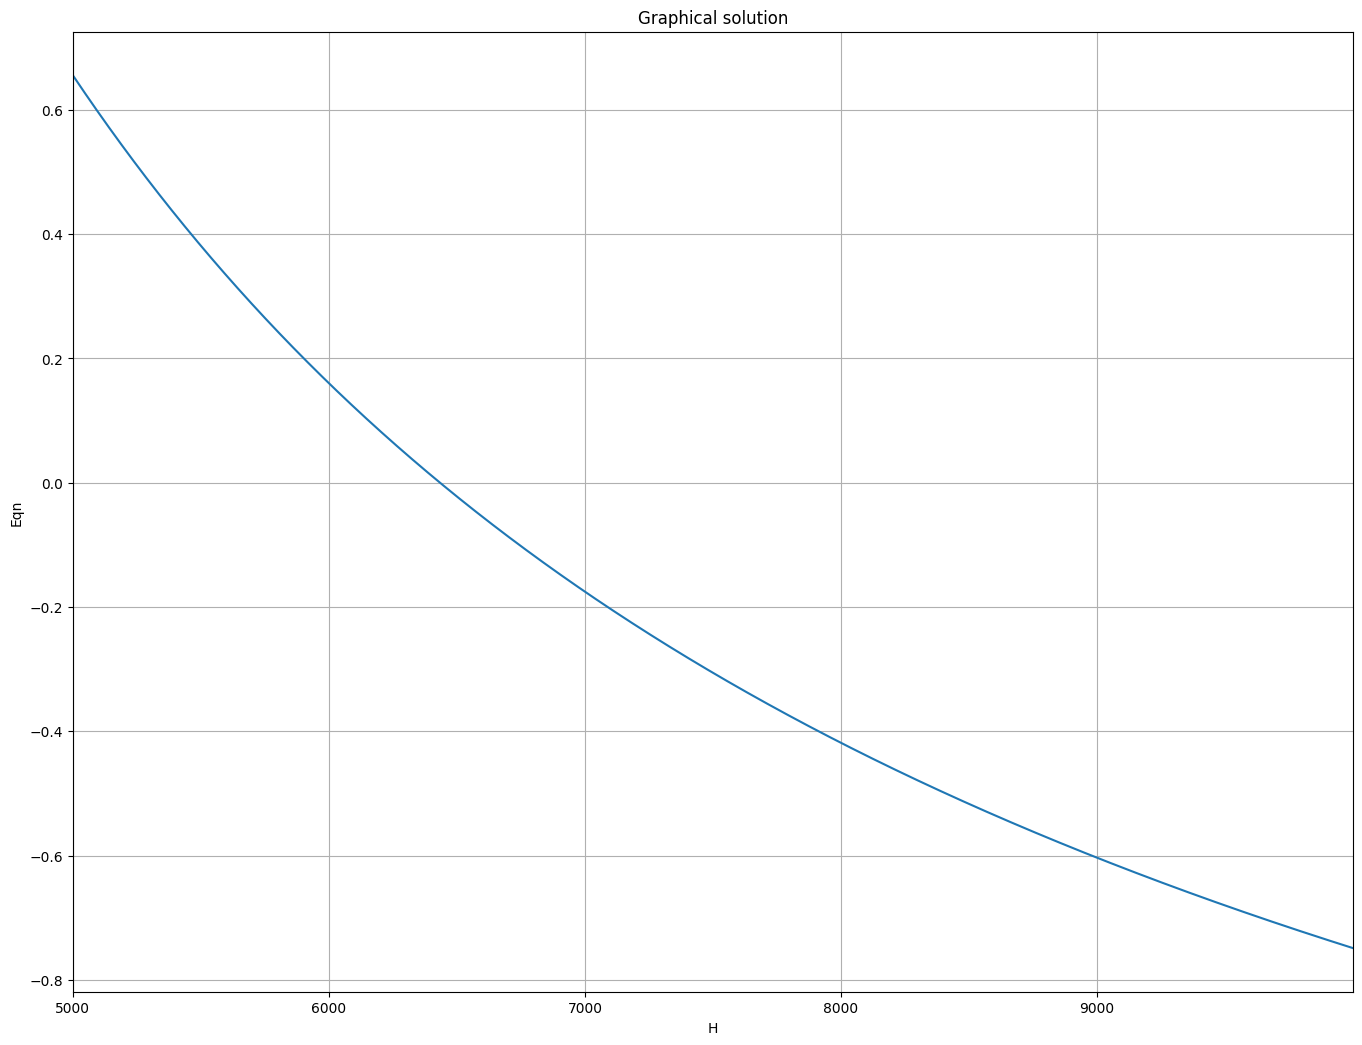

In [28]:
x = Length_meters/2 #(m) Location of target y_max
H=np.arange(5000,10000,0.1) #(N) #Range of H values to text

#Rearrange equation for y_max to be homogeneous (=0)
eqn = -y_max_meters -(H/span_weight_newtons)*(np.cosh((-span_weight_newtons/H)*(x-(Length_meters/2))) - np.cosh((span_weight_newtons*Length_meters)/(2*H)))
print(eqn)

fig = plt.figure() 
axes = fig.add_axes([0.1,0.1,2,2]) 
axes.plot(H,eqn,'-')
axes.set_xlim([H[0], H[-1]])
axes.set_xlabel('H')
axes.set_ylabel('Eqn')
axes.set_title('Graphical solution')
axes.grid()

## Identify specific value of H

In [29]:
#Cycle through solutions and find value of H that satisfies the equation
for i in np.arange(0,len(eqn)-1):            
    if eqn[i]<0 and eqn[i+1]>0:
        print(f'The required value of H is: {round(H[i],3)} N')
        H=H[i]
    elif eqn[i]>0 and eqn[i+1]<0:
        print(f'The required value of H is: {round(H[i],3)} N')
        H=H[i]

The required value of H is: 6434.0 N


## Plot the catenary

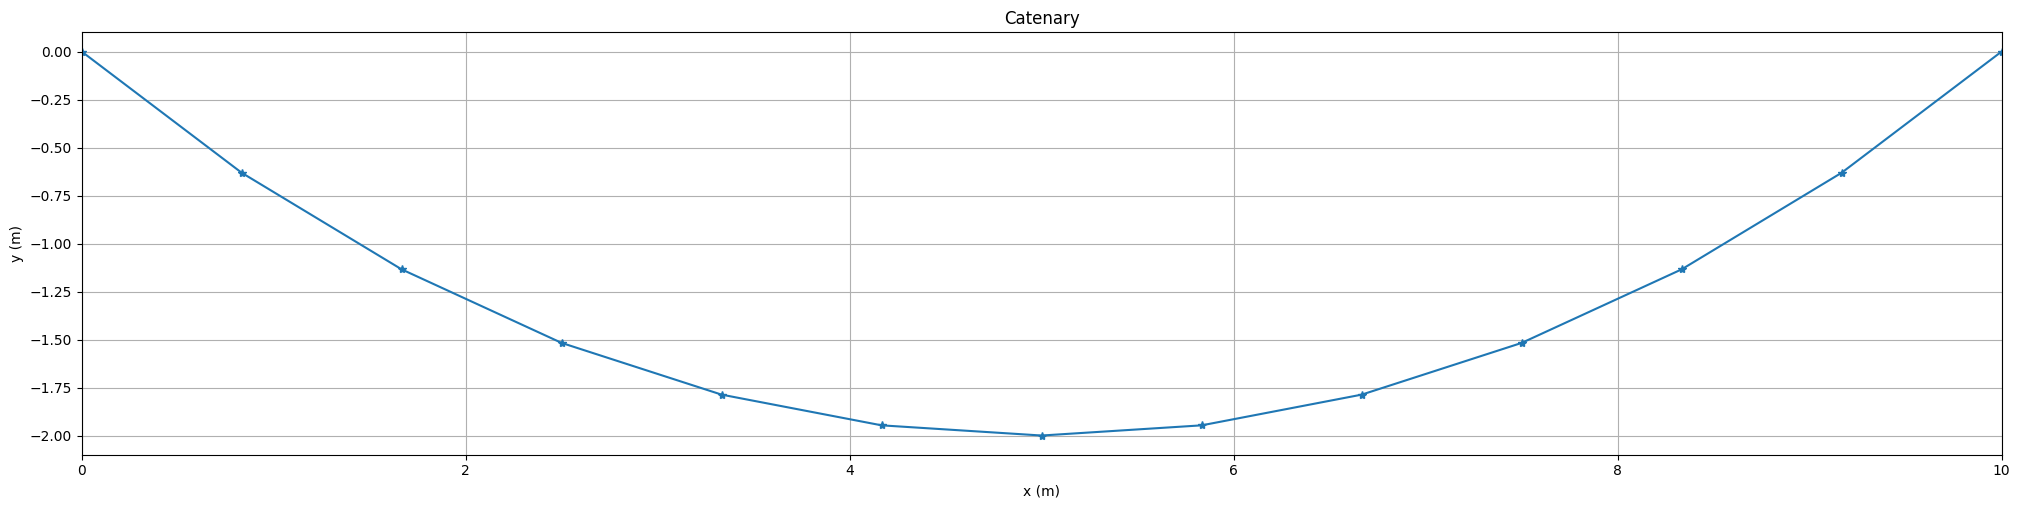

In [30]:
n=12 #Break span into n segments (on plan)
delX = Length_meters/n #Segment length (on plan)

x = np.arange(0,Length_meters + delX,delX) #Range of x-values
y = -(H/span_weight_newtons) * (np.cosh((-span_weight_newtons / H) * (x-(Length_meters / 2))) - np.cosh((span_weight_newtons * Length_meters) / (2*H))) #Corresponding y-values

#Plotting
fig = plt.figure() 
axes = fig.add_axes([0.1,0.1,3,3]) 
fig.gca().set_aspect('equal', adjustable='box')
axes.plot(x,-y,'-*')
axes.set_xlim([0, Length_meters])
axes.set_xlabel('x (m)')
axes.set_ylabel('y (m)')
axes.set_title('Catenary')
axes.grid()

## Calculate catenary length

In [31]:
L_cat=0 #Initialise the length

#Cycle through each segments and determine the length
for i in np.arange(0,len(x)-1):
    dx = abs(x[i+1]-x[i])
    dy = abs(y[i+1]-y[i])
    L_cat += math.sqrt(dx**2 + dy**2)   

print(f'The cable length is approximately {round(L_cat,3)} m')

The cable length is approximately 10.991 m


## Calculate max tension at supports

In [32]:
V = 0.5*(L_cat*span_weight_newtons) #(N) Vertical reaction at support
T_max = math.sqrt(H**2+V**2) #(N) Cable tension at the support

print(f'The vertical reaction is {round(V,2)} N')
print(f'The maximum cable tension at supports is {round(T_max,2)} N')

The vertical reaction is 5391.1 N
The maximum cable tension at supports is 8394.06 N


## Export catenary coordinates (for use later on)

In [33]:
#Initialise containers
vertices = np.empty((0,2),int) #Nodal coordinates
edges = np.empty((0,2),int) #Segment definitions

#Cycle through each node and determine coordinates and member definitions
for i in np.arange(0,len(x)):
    vertex = np.array([x[i], -y[i]])
    vertices = np.append(vertices, [vertex], axis=0)
    
    if(i<len(x)-1):
        edge = np.array([i+1, i+2])
        edges = np.append(edges, [edge], axis=0)
        
#Export vertex coordinates to CSV file 
filename = "Vertices.csv" #MAKE SURE TO USE YOUR OWN FILE PATH
# writing to csv file  
with open(filename, 'w') as csvfile:  
    csvwriter = csv.writer(csvfile)  # creating a csv writer object  
    csvwriter.writerows(vertices) # writing the data rows  
    
#Export edge/element definitions to CSV file 
filename = "Edges.csv" #MAKE SURE TO USE YOUR OWN FILE PATH
# writing to csv file  
with open(filename, 'w') as csvfile:      
    csvwriter = csv.writer(csvfile)  # creating a csv writer object  
    csvwriter.writerows(edges) # writing the data rows 

**<sub>Copyright &copy; 2022, S.P.Carroll & DegreeTutors.com. All rights reserved</sub>**